In [26]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

In [27]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait

In [3]:
# driver = webdriver.Chrome()
# driver.get('https://www.nifc.gov/fireInfo/fireInfo_stats_totalFires.html')

In [4]:
# fire = driver.find_element_by_tag_name('tbody')
# print(fire)

In [5]:
# fire.text

In [6]:
# rows = fire.find_elements_by_tag_name('tr')[3:-1]
# table = []
# for row in rows:
#     annual_fires = {}
#     annual_fires['year'] = row.find_elements_by_tag_name('td')[0].text
#     print(annual_fires['year'])
#     annual_fires['fires'] = row.find_elements_by_tag_name('td')[1].text
#     print(annual_fires['fires'])
#     annual_fires['acres'] = row.find_elements_by_tag_name('td')[2].text
#     print(annual_fires['acres'])
#     print("Scraping next row")
#     table.append(annual_fires)

In [7]:
# df = pd.DataFrame(table)
# df.head(100)

In [8]:
# df.dtypes

In [9]:
# df.to_csv("annual_fires.csv", index=False)

In [10]:
# df.year = df.year.astype('int', inplace=True)
# df.dtypes

In [11]:
# df.acres = df.acres.str.replace(',', '')

In [12]:
# df.acres = df.acres.str.replace('*', '')

In [13]:
# df.acres = df.acres.astype('int', inplace=True)
# df.dtypes

In [14]:
# df.fires = df.fires.str.replace(',', '').astype('int', inplace=True)
# df.dtypes

In [15]:
# df.to_csv("annual_fires.csv", index=False)

NameError: name 'df' is not defined

In [16]:
df = pd.read_csv("annual_fires.csv")

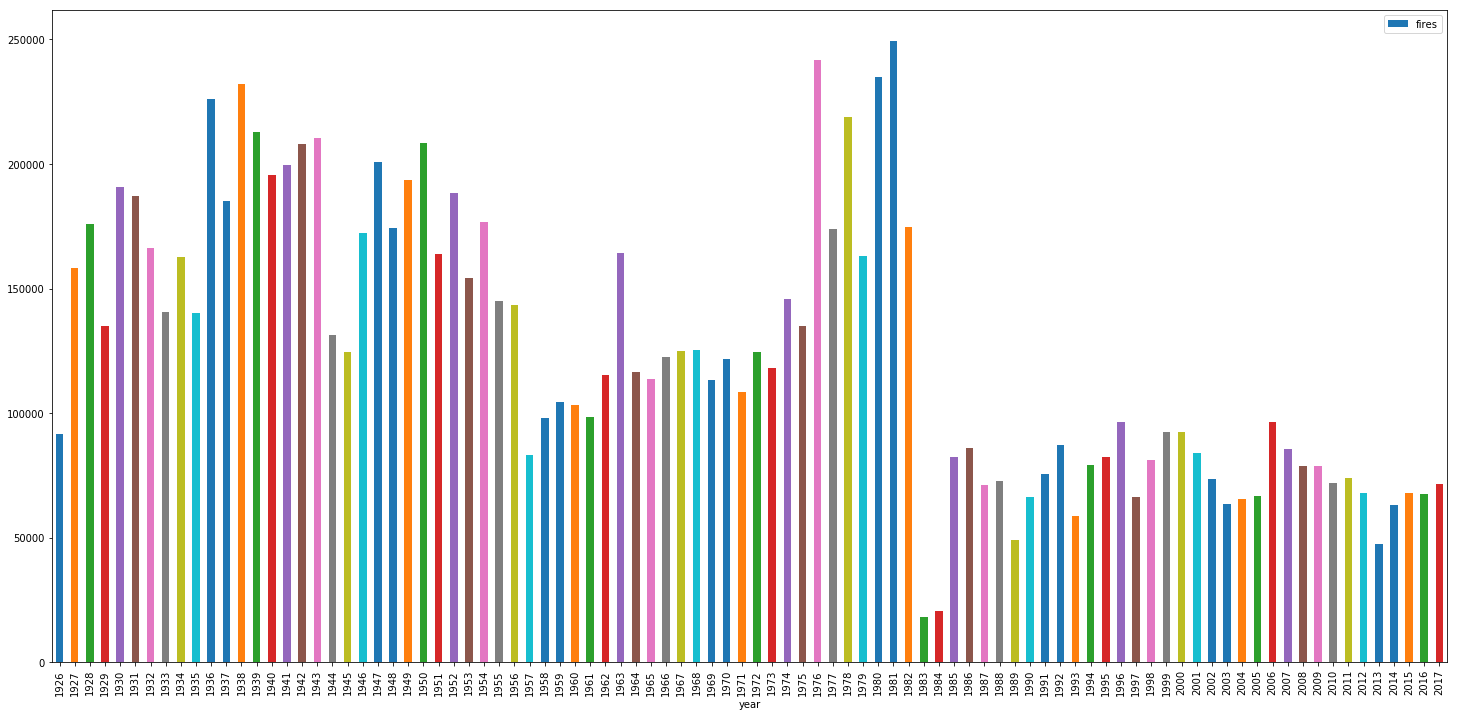

In [23]:
df.sort_values(by=['year']).plot(x='year', y='fires', kind='bar', figsize=(25,12))

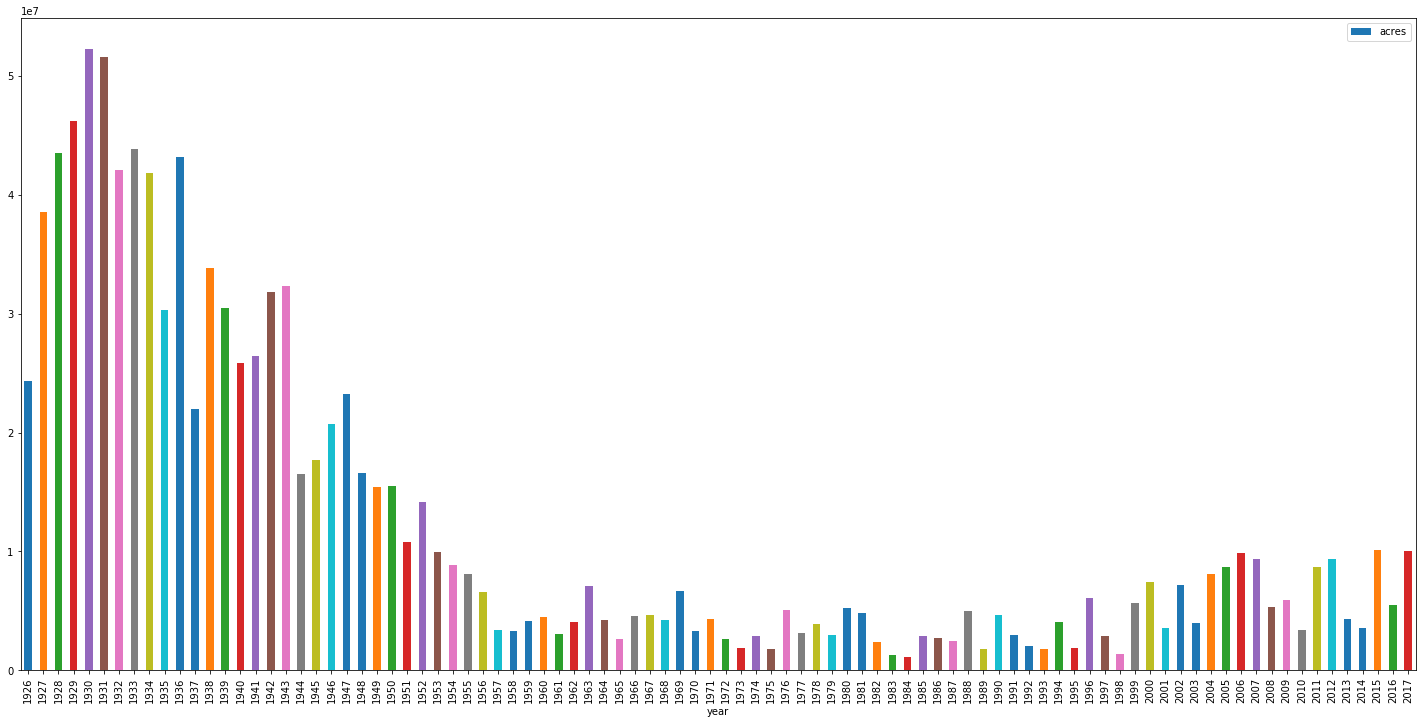

In [18]:
df.sort_values(by=['year']).plot(x='year', y='acres', kind='bar', figsize=(25,12))

These trends are NOT at all what one would expect! However there's a note with the data that data collection was not standardized until 1983, so anything before that should not be compared to the rest of the data. There's an interesting story here on why historical data is so off. But, for now, to graph post-1983 data

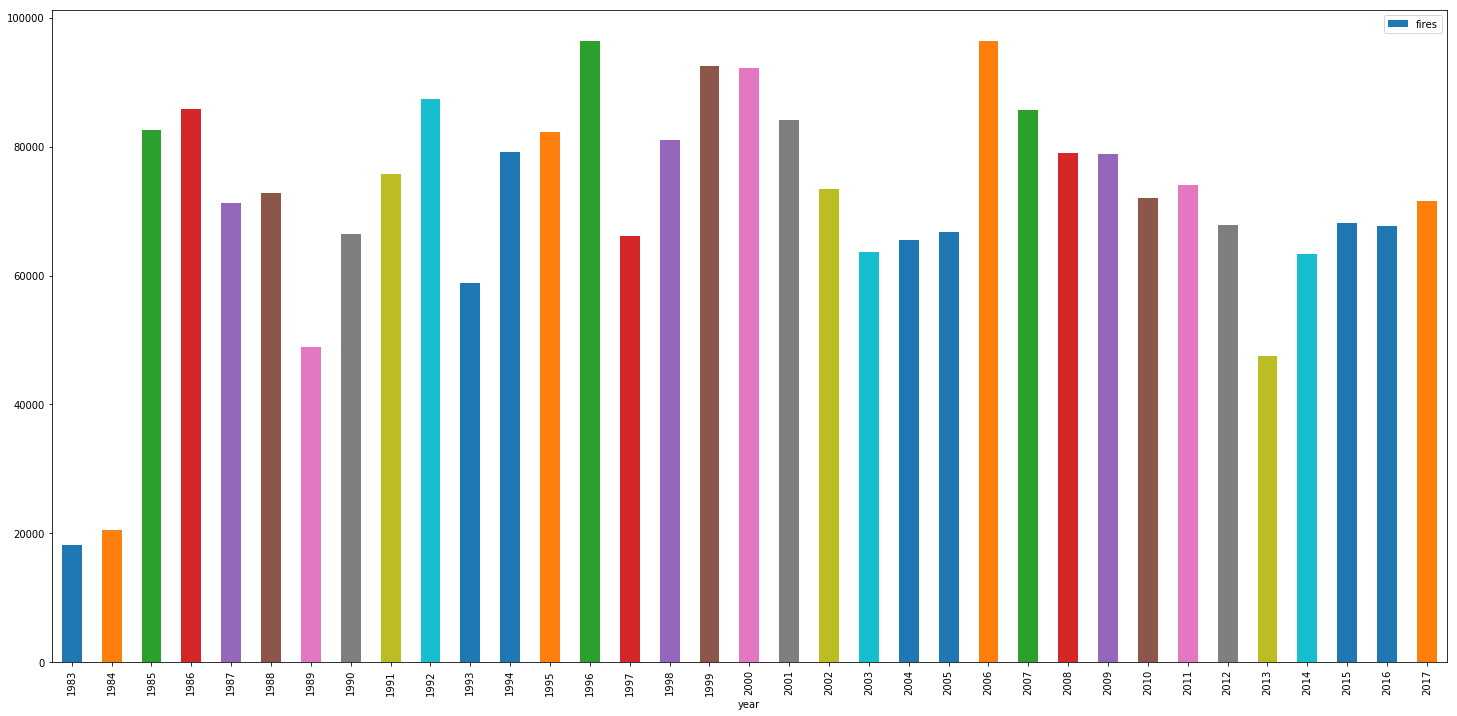

In [19]:
df.sort_values(by=['year']).tail(35).plot(x='year', y='fires', kind='bar', figsize=(25,12))

There we go! That's the trend we were expecting...

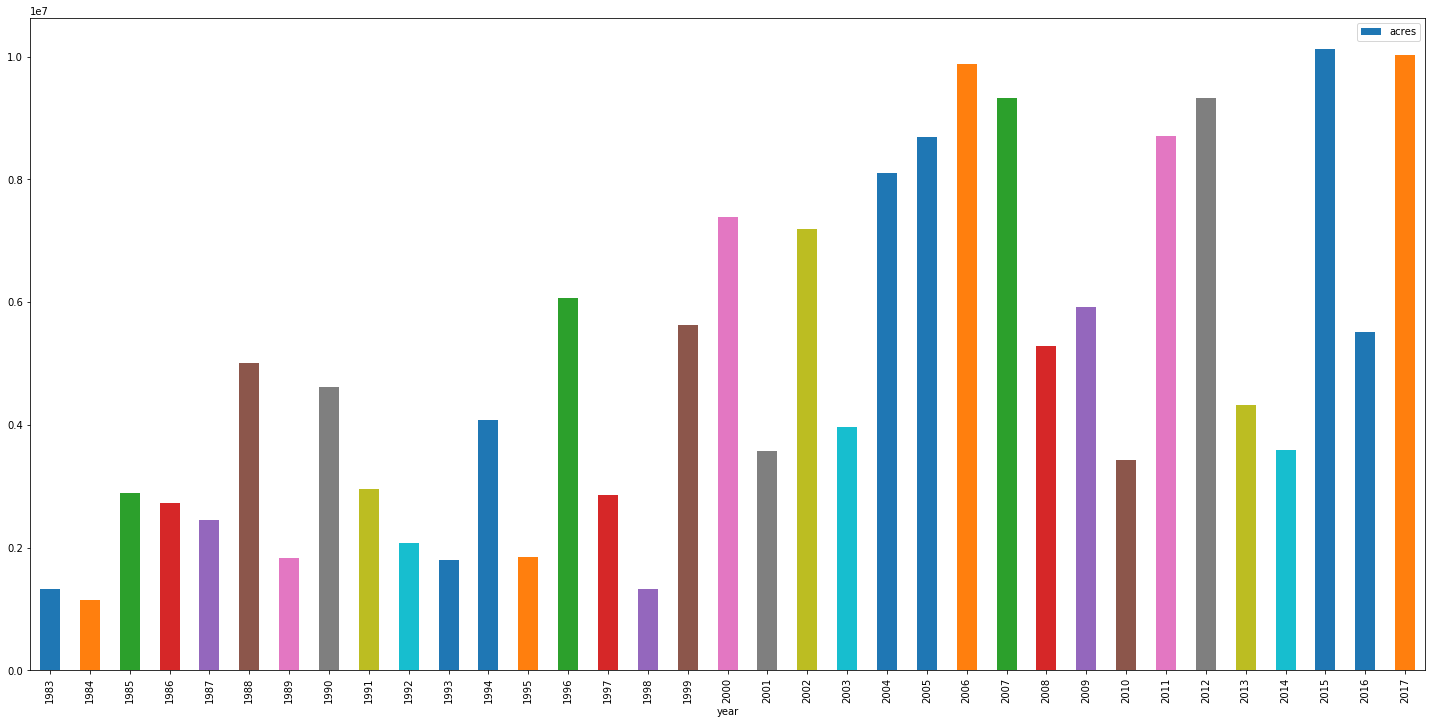

In [20]:
df.sort_values(by=['year']).tail(35).plot(x='year', y='acres', kind='bar', figsize=(25,12))

In [21]:
df['avg_acres'] = df.acres / df.fires

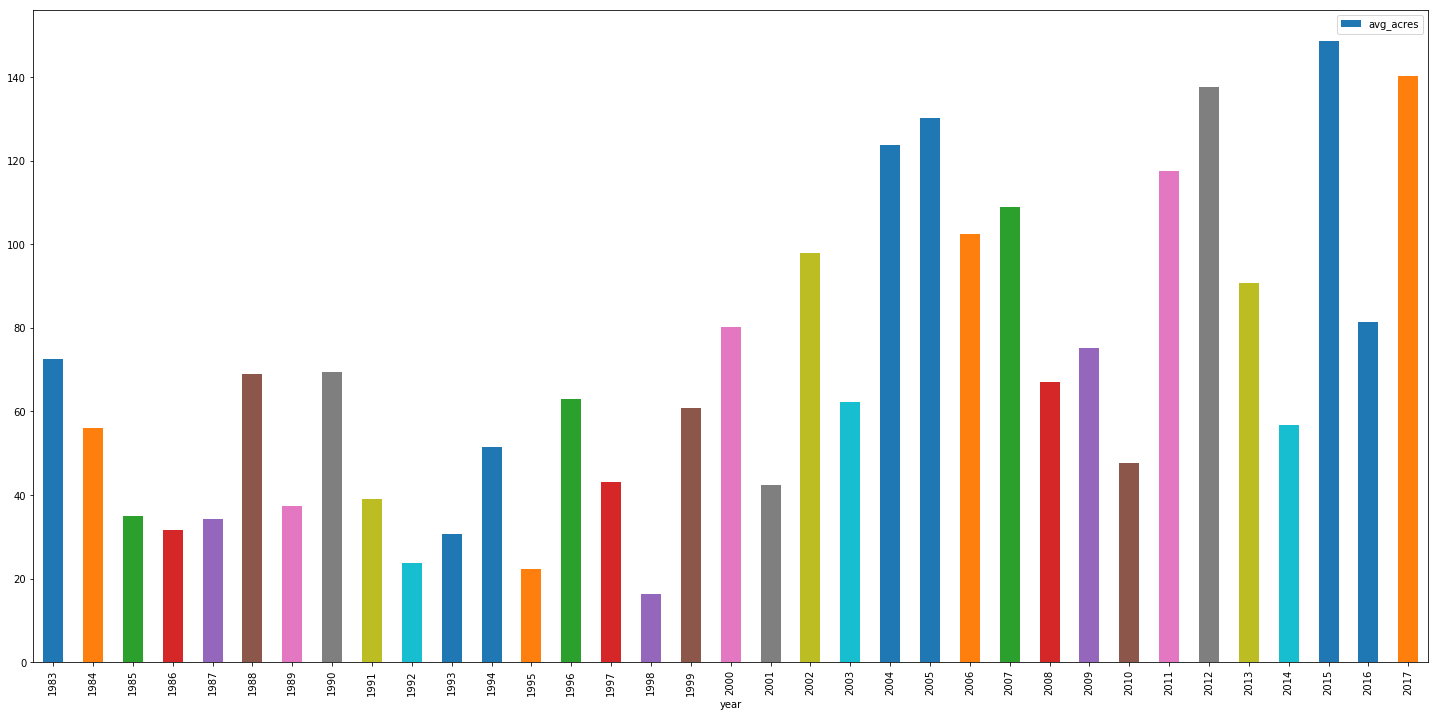

In [24]:
df.sort_values(by=['year']).tail(35).plot(x='year', y='avg_acres', kind='bar', figsize=(25,12))

In [28]:
driver = webdriver.Chrome()
driver.get('https://www.nifc.gov/fireInfo/fireInfo_stats_lgFires.html')

In [30]:
fire = driver.find_element_by_tag_name('tbody')
print(fire)

<selenium.webdriver.remote.webelement.WebElement (session="f3bd67ea992cc4b182597f9eb0754216", element="0.9682340167968382-1")>


In [31]:
fire.text

"Year Fire Name Location State Total Acres\n2004 Taylor Complex AK-TAS AK 1,305,592\n2006 East Amarillo Complex TX-TXS TX 907,245\n2017 NW Oklahoma Complex OK-OKS OK 779,292\n2007 Murphy Complex ID-TFD ID 652,016\n2009 Railbelt Complex AK-AKS AK 636,224\n2004 Eagle Complex AK-UYD AK 614,974\n1997 Inowak AK-AKS AK 610,000\n2012 Long Draw OR-VAD OR 557,628\n2004 Solstice Complex AK-UYD AK 547,505\n2011 Wallow AZ- ASF AZ 538,049\n2004 Boundary Fire AK-FAS AK 537,098\n2009 Minto Flats South AK-FAS AK 517,078\n2005 Southern Nevada Complex NV-LVD NV 508,751\n2002 Biscuit (formerly Florence) OR-SIF OR 500,068\n2015 Tanana Area Fires AK-TAD AK 498,043\n2002 Trimbly Creek OR-VAD OR 480,000\n2002 Rodeo/Chediski Complex AZ-FTA AZ 468,638\n2012 Holloway NV-WID NV 460,850\n2004 Central Complex AK-UYD AK 451,162\n2009 Crazy Mountain Complex AK-UYD AK 447,420\n2015 Ruby Area Fires AK-GAD AK 421,613\n2006 Eastern Oklahoma IA OK-OKS OK 413,964\n2014 Buzzard Complex OR-BUD OR 395,747\n2007 Big Turnaroun

In [33]:
rows = fire.find_elements_by_tag_name('tr')[1:]
table = []
for row in rows:
    sig_fires = {}
    sig_fires['year'] = row.find_elements_by_tag_name('td')[0].text
    print(sig_fires['year'])
    sig_fires['fire_name'] = row.find_elements_by_tag_name('td')[1].text
    print(sig_fires['fire_name'])
    sig_fires['location'] = row.find_elements_by_tag_name('td')[2].text
    print(sig_fires['location'])
    sig_fires['state'] = row.find_elements_by_tag_name('td')[3].text
    print(sig_fires['state'])
    sig_fires['acres'] = row.find_elements_by_tag_name('td')[4].text
    print(sig_fires['acres'])
    print("Scraping next row")
    table.append(sig_fires)

2004
Taylor Complex
AK-TAS
AK
1,305,592
Scraping next row
2006
East Amarillo Complex
TX-TXS
TX
907,245
Scraping next row
2017
NW Oklahoma Complex
OK-OKS
OK
779,292
Scraping next row
2007
Murphy Complex
ID-TFD
ID
652,016
Scraping next row
2009
Railbelt Complex
AK-AKS
AK
636,224
Scraping next row
2004
Eagle Complex
AK-UYD
AK
614,974
Scraping next row
1997
Inowak
AK-AKS
AK
610,000
Scraping next row
2012
Long Draw
OR-VAD
OR
557,628
Scraping next row
2004
Solstice Complex
AK-UYD
AK
547,505
Scraping next row
2011
Wallow
AZ- ASF
AZ
538,049
Scraping next row
2004
Boundary Fire
AK-FAS
AK
537,098
Scraping next row
2009
Minto Flats South
AK-FAS
AK
517,078
Scraping next row
2005
Southern Nevada Complex
NV-LVD
NV
508,751
Scraping next row
2002
Biscuit (formerly Florence)
OR-SIF
OR
500,068
Scraping next row
2015
Tanana Area Fires
AK-TAD
AK
498,043
Scraping next row
2002
Trimbly Creek
OR-VAD
OR
480,000
Scraping next row
2002
Rodeo/Chediski Complex
AZ-FTA
AZ
468,638
Scraping next row
2012
Holloway
NV-

2004
Willow
AZ-TNF
AZ
119,500
Scraping next row
2006
Oklahoma Fire Response
OK-OKS
OK
117,686
Scraping next row
2006
South End Complex
OR-BUD
OR
117,553
Scraping next row
2005
Boundary Creek
AK-UYD
AK
113,463
Scraping next row
2016
Alatna Complex
AK-TAK
AK
113,157
Scraping next row
2006
Tripod Complex
WA-OWF
WA
113,011
Scraping next row
2013
Beaver Creek
ID-TFD
ID
111,490
Scraping next row
2015
Sea
AK-TAD
AK
111,193
Scraping next row
2011
Indian Creek
NV-NDF
NV
110,827
Scraping next row
2017
Central LNU Complex
CA-LNU
CA
110,720
Scraping next row
2015
Canyon Creek Complex
OR-MAF
OR
110,261
Scraping next row
2000
Mule Dry
WA-WFS
WA
110,000
Scraping next row
2013
West Fork Complex
AK-DOF
AK
109,615
Scraping next row
2010
Jefferson
ID-INL
ID
109,436
Scraping next row
2006
Columbia Complex
OR-UMF
OR
109,259
Scraping next row
2007
Florida Bugaboo
FL-FNF
FL
108,574
Scraping next row
2006
Amazon
NV-EKD
NV
108,564
Scraping next row
2003
Simi Incident
CA-VNC
CA
108,304
Scraping next row
2011
Hi

In [35]:
df = pd.DataFrame(table)
df.head()

,acres,fire_name,location,state,year
0,"1,305,592",Taylor Complex,AK-TAS,AK,2004
1,"907,245",East Amarillo Complex,TX-TXS,TX,2006
2,"779,292",NW Oklahoma Complex,OK-OKS,OK,2017
3,"652,016",Murphy Complex,ID-TFD,ID,2007
4,"636,224",Railbelt Complex,AK-AKS,AK,2009


In [38]:
df.to_csv("significant_fires.csv", index=False)
df.head()

,acres,fire_name,location,state,year
0,"1,305,592",Taylor Complex,AK-TAS,AK,2004
1,"907,245",East Amarillo Complex,TX-TXS,TX,2006
2,"779,292",NW Oklahoma Complex,OK-OKS,OK,2017
3,"652,016",Murphy Complex,ID-TFD,ID,2007
4,"636,224",Railbelt Complex,AK-AKS,AK,2009


In [39]:
df.year = df.year.astype('int', inplace=True)
df.dtypes

acres        object
fire_name    object
location     object
state        object
year         int64 
dtype: object

In [41]:
df.acres = df.acres.str.replace(',', '')
df.acres = df.acres.str.replace('.', '')
df.acres = df.acres.astype('int', inplace=True)

In [42]:
df.dtypes

acres        int64 
fire_name    object
location     object
state        object
year         int64 
dtype: object

In [43]:
df.to_csv("significant_fires.csv", index=False)

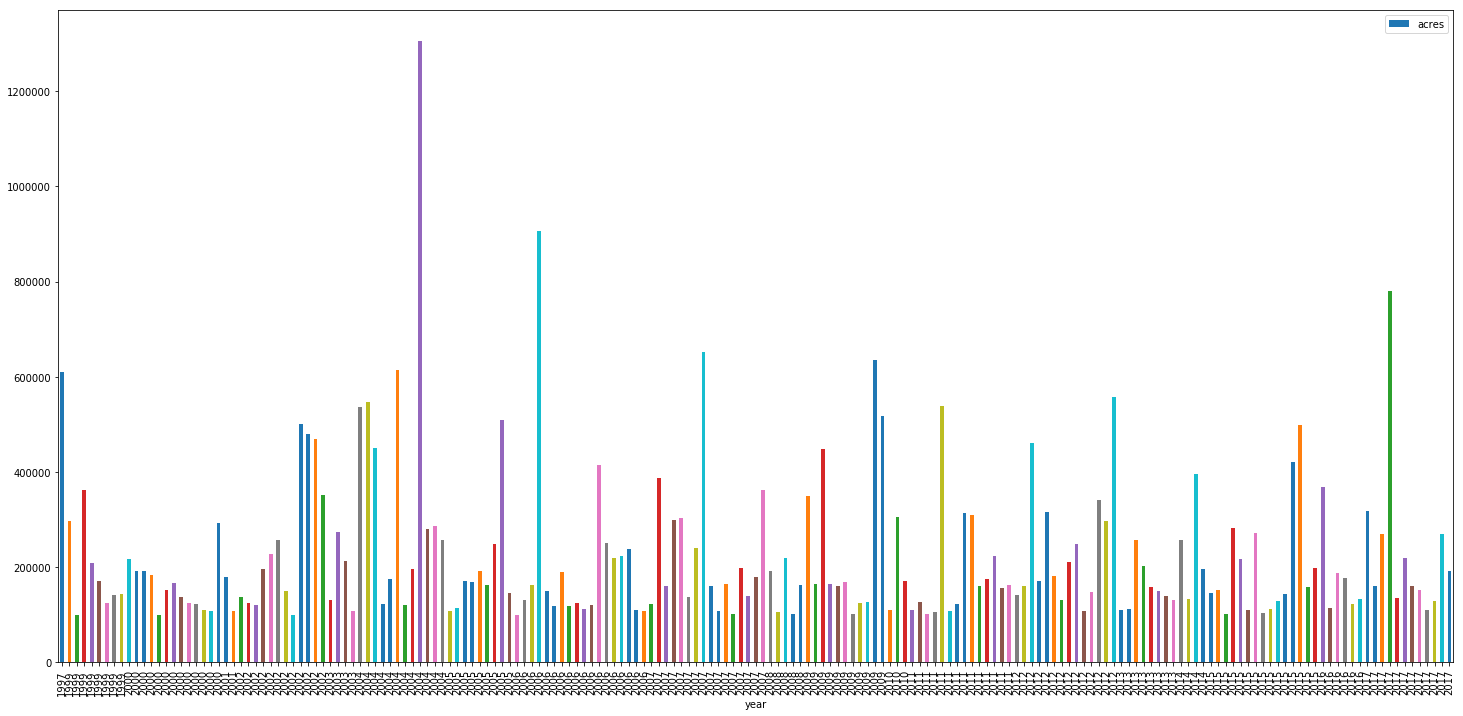

In [44]:
df.sort_values(by=['year']).plot(x='year', y='acres', kind='bar', figsize=(25,12))